In [1]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_test = pd.read_csv('data/test.csv')

In [3]:
print(df_train.head())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     2.0     5.0  5132022       5    13   2022    1100.0  2022000436   
1     9.0     1.0  2282022       2    28   2022    1200.0  2022005381   
2    19.0     1.0  1202022       1    20   2022    1100.0  2022000927   
3    39.0     8.0  8122022       8    12   2022    1100.0  2022014408   
4    25.0     7.0  7222022       7    22   2022    1200.0  2022010910   

           _PSU  CTELENM1  ...  DRNKANY6      DROCDY4_  _RFBING6  \
0  2.022000e+09       1.0  ...       1.0  2.700000e+01       1.0   
1  2.022005e+09       NaN  ...       9.0  9.000000e+02       9.0   
2  2.022001e+09       1.0  ...       2.0  5.397605e-79       1.0   
3  2.022014e+09       NaN  ...       2.0  5.397605e-79       1.0   
4  2.022011e+09       NaN  ...       1.0  1.700000e+01       2.0   

       _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  ID  TARGET  
0  1.870000e+02       1.0       1.0       1.0       2.0   0    True  
1  9.990000e

# Colonnes à éliminer 

## Tri manuel (bulle)

- FMONTH
- IDATE
- IMONTH
- IYEAR
- SEQNO
- _PSU
- CTELENM1 -> virer si value = 2 puis virer la colonne
- PVTRESD1
- COLGHOUS
- STATERE1
- CELPHON1
- LADULT1 -> VIRER SI VALUE = 2 PUIS VIRER COLONNE
- COLGSEX1
- NUMADULT
- NUMMEN
- NUMWOMEN
- RESPSLCT
- LANDSEX1
- CELLSEX1
- SAFETIME
- CTELNUM1
- CELLFON5
- CADULT1
- PVTRESD3
- CCLGHOUS
- CSTATE1
- LANDLINE
- HHADULT
- LASTDEN4
- RMVTETH4
- NUMHHOL4
- VIRCOLO1
- TOLDCFS
- HAVECFS
- WORKCFS
- CAREGIV1
- CRGVREL4
- CSRVSUM
- CRGVLNG1
- CRGVHRS1
- CRGVPRB3
- CRGVALZD
- CRGVPER1
- CRGVHOU1
- CRGVEXPT
- FIREARM5
- GUNLOAD
- LOADULK2
- RCSGEND1
- RCSXBRTH
- RCSRLTN2
- CASTHDX2
- CASTHNO2
- BIRTHSEX
- WHEREGET
- NOBCUSE8
- RRCOGNT2
- QSTVER
- QSTLANG
- _STSTR
- _STRWT
- _RAWRAKE
- _WT2RAKE
- CAGEG
- _CLLCPWT
- _DUALUSE
- _DUALCOR
- _LLCPWT2
- _LLCPWT
- _EXTETH3
- _ALTETH3
- _DENVST3
- _PRACE2


In [5]:
df_réduit = df_train.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_DENVST3', '_PRACE2'
])

df_test = df_test.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_DENVST3', '_PRACE2'
])

In [6]:
df_réduit.tail()

df_test.tail()

,_STATE,IDAY,DISPCODE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,...,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID
74995,19.0,7,1100.0,1.0,1.0,88.0,88.0,NaN,3.0,1.0,...,NaN,1.0,1.000000e+02,2.0,2.800000e+03,2.0,1.0,1.0,2.0,299995
74996,36.0,30,1200.0,1.0,2.0,88.0,88.0,NaN,99.0,2.0,...,NaN,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,NaN,299996
74997,20.0,11,1200.0,2.0,4.0,88.0,7.0,88.0,88.0,1.0,...,NaN,1.0,1.000000e+01,2.0,4.200000e+02,1.0,NaN,NaN,2.0,299997
74998,23.0,8,1100.0,2.0,1.0,88.0,88.0,NaN,2.0,1.0,...,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,299998
74999,19.0,23,1200.0,1.0,2.0,88.0,88.0,NaN,1.0,1.0,...,NaN,1.0,7.000000e+00,2.0,9.990000e+04,9.0,NaN,NaN,1.0,299999


In [7]:
df_réduit['TARGET'] = df_réduit['TARGET'].astype(int)

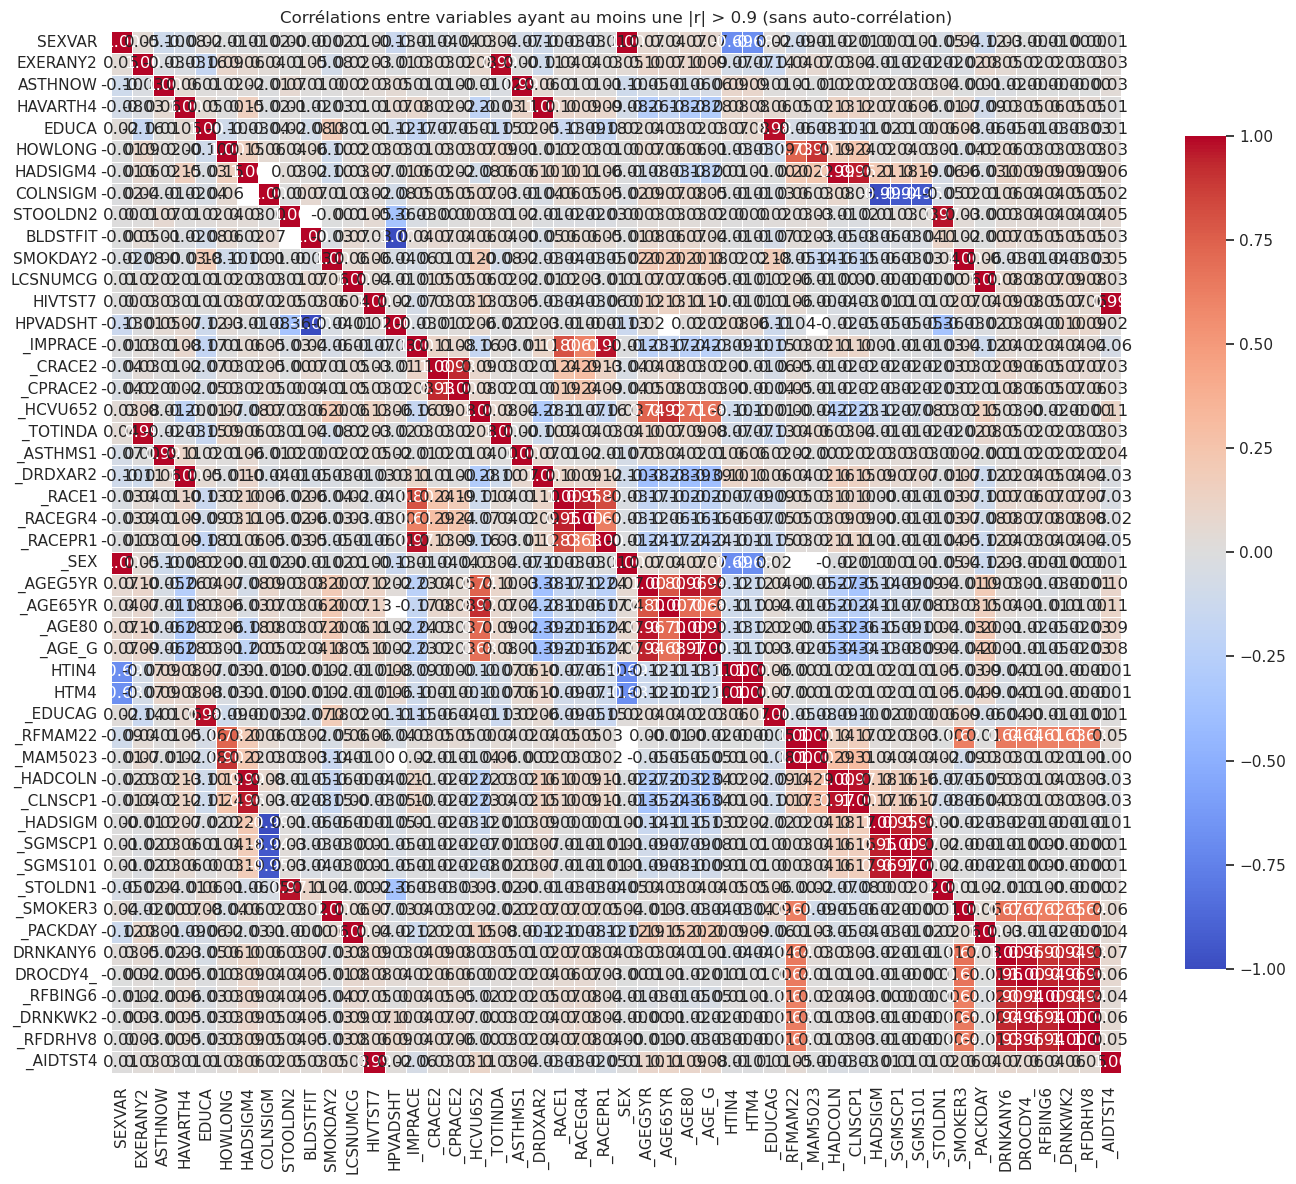

Nombre de paires avec |corr| > 0.9 : 39
Nombre de variables concernées : 48
   feature_1 feature_2      corr
0   HAVARTH4  _DRDXAR2  1.000000
1   _RFMAM22  _MAM5023  1.000000
2   BLDSTFIT  HPVADSHT -1.000000
3   LCSNUMCG  _PACKDAY  1.000000
4      HTIN4      HTM4  0.999628
5   SMOKDAY2  _SMOKER3  0.997445
6   _DRNKWK2  _RFDRHV8  0.996869
7     SEXVAR      _SEX  0.996477
8    ASTHNOW  _ASTHMS1  0.994255
9   COLNSIGM  _HADSIGM -0.993942
10   HIVTST7  _AIDTST4  0.992936
11  EXERANY2  _TOTINDA  0.991966
12  HADSIGM4  _HADCOLN  0.988280
13     EDUCA   _EDUCAG  0.979516
14  _SGMSCP1  _SGMS101  0.974233
15    _AGE80    _AGE_G  0.974025
16  STOOLDN2  _STOLDN1  0.971689
17  _IMPRACE  _RACEPR1  0.971256
18  _HADCOLN  _CLNSCP1  0.968849
19  _AGEG5YR    _AGE80  0.964468
20  DROCDY4_  _DRNKWK2  0.963520
21  DROCDY4_  _RFDRHV8  0.963157
22  DRNKANY6  DROCDY4_  0.961511
23  _HADSIGM  _SGMS101  0.959680
24  HADSIGM4  _CLNSCP1  0.959382
25  COLNSIGM  _SGMS101 -0.952474
26    _RACE1  _RACEGR4  0.951703


In [8]:
# Calcul de la matrice de corrélation et affichage en ne gardant que |corr| > 0.5
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes numériques
num_df = df_réduit.select_dtypes(include='number').copy()
corr_df = num_df.corr()

# Seuil
threshold = 0.9

# Mettre la diagonale à 0 pour ne pas compter les auto-corrélations
corr_no_diag = corr_df.copy()
np.fill_diagonal(corr_no_diag.values, 0)

# Identifier les colonnes ayant au moins une corrélation > threshold
mask_threshold = corr_no_diag.abs() > threshold
cols_to_keep = mask_threshold.any(axis=0)
selected_cols = corr_df.columns[cols_to_keep].tolist()

# Filtrer la matrice de corrélation
filtered_corr_matrix = corr_df.loc[selected_cols, selected_cols]

# Affichage de la heatmap
plt.figure(figsize=(14, 12))
sns.set(style='white')
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title(f'Corrélations entre variables ayant au moins une |r| > {threshold} (sans auto-corrélation)')
plt.tight_layout()
plt.show()

# Extraire la liste des paires de variables avec |corr| > threshold (sans doublons i-j / j-i)
high_corr_filtered = corr_no_diag.where(corr_no_diag.abs() > threshold)
high_corr = high_corr_filtered.stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'corr']

# Normaliser l'ordre des paires pour supprimer les duplicatas
high_corr['pair'] = high_corr.apply(lambda x: tuple(sorted([x['feature_1'], x['feature_2']])), axis=1)
high_corr = high_corr.drop_duplicates('pair').drop(columns='pair')

# Trier par valeur absolue de corrélation décroissante et afficher
high_corr = high_corr.reindex(high_corr['corr'].abs().sort_values(ascending=False).index)
print(f"Nombre de paires avec |corr| > {threshold} :", len(high_corr))
print(f"Nombre de variables concernées : {len(selected_cols)}")
print(high_corr.reset_index(drop=True))

In [9]:
# Déterminer et afficher les features numériques dont la corrélation (valeur absolue) avec TARGET est < 0.1
# (utilise num_df déjà défini dans le notebook)
corr_with_target = num_df.corr()['TARGET'].drop('TARGET')
abs_corr = corr_with_target.abs()

low_corr = corr_with_target[abs_corr < 0.1].sort_values(key=lambda s: s.abs())

print(f"Nombre de features numériques avec |corr| < 0.1 : {len(low_corr)}")
print(low_corr)

Nombre de features numériques avec |corr| < 0.1 : 232
ID          0.000135
ASBIDRNK   -0.000325
_STATE      0.000336
RRCLASS3    0.000477
COVIDSMP   -0.000626
              ...   
INSULIN1   -0.087843
PNEUVAC4   -0.090474
_YRSQUIT    0.092048
CHCCOPD3   -0.094463
_PHYS14D    0.099125
Name: TARGET, Length: 232, dtype: float64


In [10]:
# Supprimer les features numériques faiblement corrélées avec TARGET (|corr| < 0.1)
to_drop = [c for c in low_corr.index if c in df_réduit.columns]
df_réduit.drop(columns=to_drop, inplace=True)

# Mettre à jour num_df pour refléter la nouvelle dataframe réduite
num_df = df_réduit.select_dtypes(include='number').copy()

print(f"Colonnes supprimées ({len(to_drop)}):", to_drop)
print("Nouvelle forme de df_réduit :", df_réduit.shape)

Colonnes supprimées (232): ['ID', 'ASBIDRNK', '_STATE', 'RRCLASS3', 'COVIDSMP', 'COVIDPRM', 'IDAY', 'COLNCNCR', 'SDHSTRE1', 'DIABTYPE', 'NUMPHON4', 'INCOME3', 'ACESWEAR', 'ACEDRINK', 'LCSSCNCR', 'MAXDRNKS', 'PERSDOC3', 'CSRVINSR', 'TYPCNTR9', 'USENOW3', 'MEDCOST1', 'PSATEST1', 'CERVSCRN', 'PREGNANT', 'RRTREAT', 'SMALSTOL', 'ACEPRISN', 'ACETTHEM', 'CSRVPAIN', 'COVIDPOS', 'RRHCARE4', 'CSRVTRT3', 'SOFEMALE', 'RRPHYSM2', 'DRNKANY6', 'BRTHCNT4', 'TRNSGNDR', 'BCPREFER', 'HPVADVC4', '_HLTHPLN', 'CNCRTYP2', '_RFSMOK3', 'AVEDRNK3', 'ACEDRUGS', '_RFMAM22', 'LCSNUMCG', 'ACETOUCH', 'ASBIRDUC', 'SDHUTILS', '_SBONTI1', '_RFBLDS5', 'ACEDEPRS', 'CHKHEMO3', 'ASBIADVC', 'STOOLDN2', 'SDHBILLS', 'CSRVCLIN', 'HADSEX', '_CPRACE2', '_CRACE2', 'ACEDIVRC', 'ASBIALCH', 'PCPSARS2', 'CSRVCTL2', 'DIABEYE1', 'ACEPUNCH', '_CURECI2', '_DRNKWK2', '_RACEG22', 'ACEHVSEX', 'ACEADSAF', 'HEATTBCO', '_MRACE2', 'LASTSMK2', 'HIVRISK5', '_STOLDN1', 'RRATWRK2', 'DROCDY4_', 'ACEADNED', '_HISPANC', 'HTIN4', 'MENTCIGS', '_RFDRHV8'

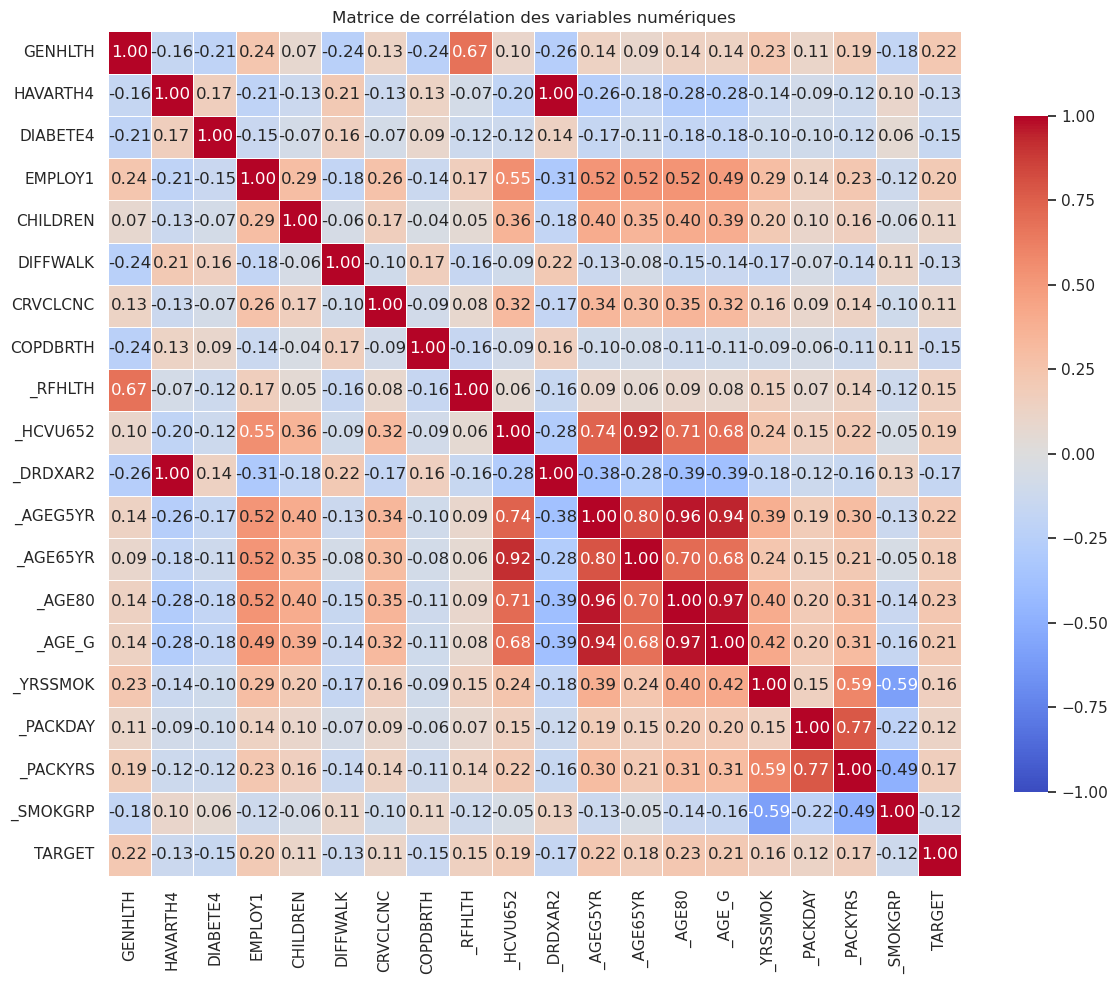

In [11]:
# Calcul de la matrice de corrélation et affichage en heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques (on retire les colonnes 'Unnamed: 0' si présentes)
num_df = df_réduit.select_dtypes(include='number').copy()

corr_df = num_df.corr()

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.set(style='white')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

In [12]:
df_réduit = df_réduit.drop(columns = ['_DRDXAR2', '_AGE80', '_AGEG5YR', '_AGE65YR'])

df_test = df_test.drop(columns = ['_DRDXAR2', '_AGE80', '_AGEG5YR', '_AGE65YR'])

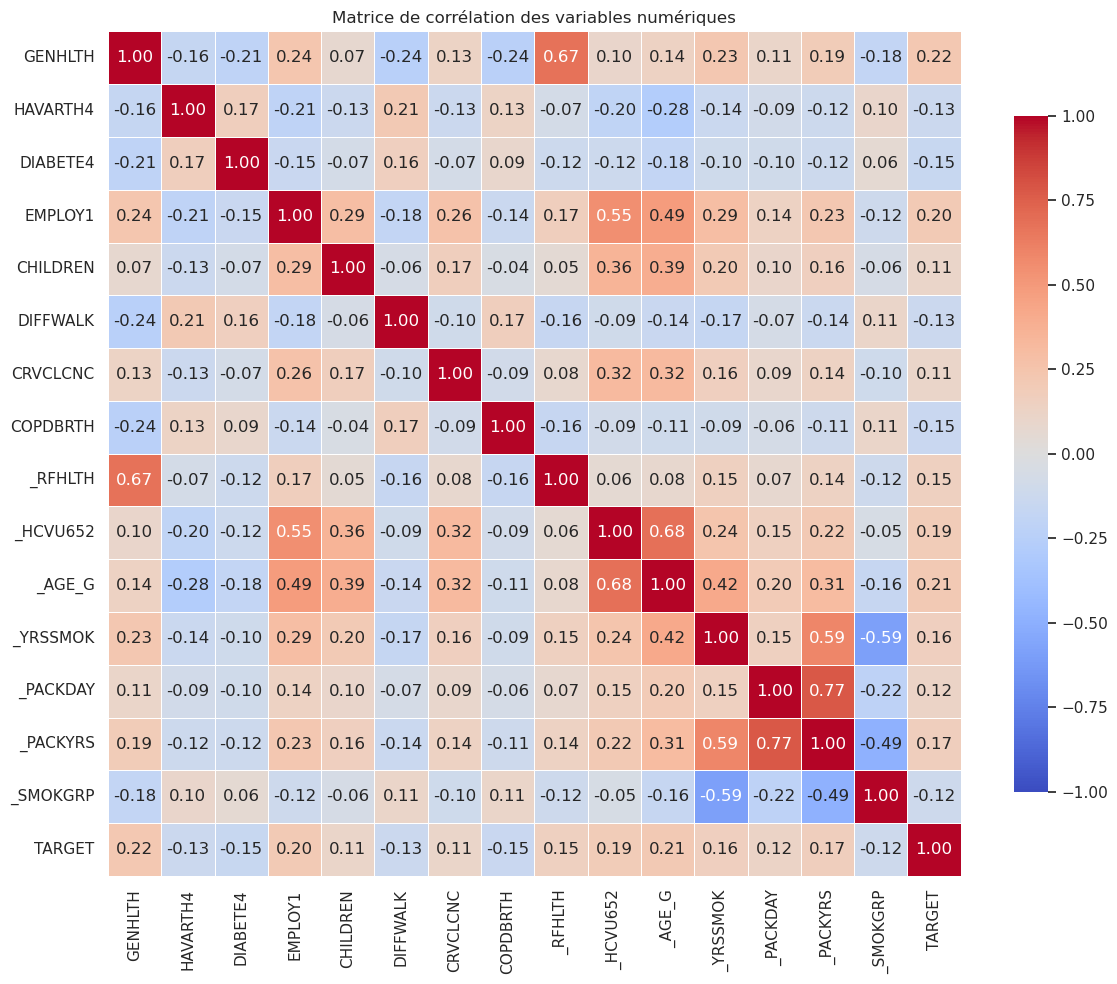

In [13]:
# Calcul de la matrice de corrélation et affichage en heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques (on retire les colonnes 'Unnamed: 0' si présentes)
num_df = df_réduit.select_dtypes(include='number').copy()

corr_df = num_df.corr()

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.set(style='white')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

In [14]:
df_réduit.head()

,GENHLTH,HAVARTH4,DIABETE4,EMPLOY1,CHILDREN,DIFFWALK,CRVCLCNC,COPDBRTH,_RFHLTH,_HCVU652,_AGE_G,_YRSSMOK,_PACKDAY,_PACKYRS,_SMOKGRP,TARGET
0,3.0,1.0,3.0,7.0,88.0,2.0,NaN,NaN,1.0,9.0,6.0,22.0,2.00,44.0,3.0,1
1,3.0,2.0,3.0,5.0,2.0,2.0,5.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,4.0,0
2,2.0,2.0,3.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,3.0,9.0,0.75,7.0,3.0,0
3,3.0,2.0,3.0,1.0,88.0,2.0,NaN,NaN,1.0,1.0,5.0,NaN,NaN,NaN,4.0,0
4,3.0,2.0,3.0,1.0,88.0,2.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,4.0,0


In [15]:
X_train, y_train = df_réduit.drop(columns=['TARGET']), df_réduit['TARGET']

In [16]:
import xgboost as xgb
from sklearn.metrics import classification_report
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_train)
print(classification_report(y_train, y_pred_xgb))

/home/lescaron/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:24:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.92      1.00      0.95    204861
           1       0.71      0.06      0.12     20139

    accuracy                           0.91    225000
   macro avg       0.81      0.53      0.54    225000
weighted avg       0.90      0.91      0.88    225000



In [17]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

n_estimators = 100
# On utilise warm_start pour faire grandir la forêt progressivement et afficher la progression
model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True, n_jobs=-1)

with tqdm(total=n_estimators, desc="Training RandomForest", unit="est") as pbar:
    for i in range(n_estimators):
        model.n_estimators = i + 1
        model.fit(X_train, y_train)
        pbar.update(1)

# On évalue le modèle 
y_pred_rf = model.predict(X_train)

print(classification_report(y_train, y_pred_rf))

Training RandomForest: 100%|██████████| 100/100 [01:03<00:00,  1.58est/s]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97    204861
           1       0.94      0.48      0.64     20139

    accuracy                           0.95    225000
   macro avg       0.94      0.74      0.81    225000
weighted avg       0.95      0.95      0.94    225000



In [26]:
# Génération du fichier de soumission (ID, TARGET) à partir du test set

# Aligner les features du test sur celles utilisées par le modèle
X_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Prédiction binaire sur le test set
y_pred_test = model.predict(X_test).astype(int)

# Construire et sauvegarder le fichier de soumission
submission = pd.DataFrame({
    'ID': df_test['ID'],
    'TARGET': y_pred_test
})

submission.to_csv('submission.csv', index=False)
print("Fichier créé: submission.csv")
print(submission.head())

Fichier créé: submission.csv
       ID  TARGET
0  225000       0
1  225001       0
2  225002       0
3  225003       0
4  225004       0


## Resampling


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split stratifié du jeu d'entraînement en train / validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print("Shapes -> X_tr:", X_tr.shape, "X_val:", X_val.shape, "y_tr:", y_tr.shape, "y_val:", y_val.shape)
print("\nRépartition TARGET (train):\n", y_tr.value_counts(normalize=True))
print("\nRépartition TARGET (val):\n", y_val.value_counts(normalize=True))

# Évaluer les modèles existants sur la validation (si présents)
if 'model' in globals():
    y_pred_val_rf = model.predict(X_val)
    print("\nRandomForest (validation):")
    print(classification_report(y_val, y_pred_val_rf))
else:
    print("\nVariable 'model' (RandomForest) non trouvée.")

if 'model_xgb' in globals():
    y_pred_val_xgb = model_xgb.predict(X_val)
    print("\nXGBoost (validation):")
    print(classification_report(y_val, y_pred_val_xgb))
else:
    print("\nVariable 'model_xgb' (XGBoost) non trouvée.")

Shapes -> X_tr: (180000, 15) X_val: (45000, 15) y_tr: (180000,) y_val: (45000,)

Répartition TARGET (train):
 TARGET
0    0.910494
1    0.089506
Name: proportion, dtype: float64

Répartition TARGET (val):
 TARGET
0    0.910489
1    0.089511
Name: proportion, dtype: float64

RandomForest (validation):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40972
           1       0.93      0.48      0.64      4028

    accuracy                           0.95     45000
   macro avg       0.94      0.74      0.80     45000
weighted avg       0.95      0.95      0.94     45000


XGBoost (validation):
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     40972
           1       0.70      0.07      0.12      4028

    accuracy                           0.91     45000
   macro avg       0.81      0.53      0.54     45000
weighted avg       0.90      0.91      0.88     45000



In [19]:
# Séparer les classes
X_1 = X_train[y_train == 1]
X_0 = X_train[y_train == 0]
y_1 = y_train[y_train == 1]
y_0 = y_train[y_train == 0]

# Calcul du nombre total pour obtenir 30% de 1
n_total = len(y_train)
n_1_target = int(n_total * 0.3)
n_0_target = n_total - n_1_target

# Sur-échantillonnage des 1
X_1_oversampled = X_1.sample(n=n_1_target, replace=True, random_state=42)
y_1_oversampled = y_1.sample(n=n_1_target, replace=True, random_state=42)

# Sous-échantillonnage des 0
X_0_undersampled = X_0.sample(n=n_0_target, random_state=42)
y_0_undersampled = y_0.sample(n=n_0_target, random_state=42)

# Concaténer
X_train_balanced = pd.concat([X_1_oversampled, X_0_undersampled])
y_train_balanced = pd.concat([y_1_oversampled, y_0_undersampled])

# Mélanger
X_train_balanced, y_train_balanced = X_train_balanced.sample(frac=1, random_state=42), y_train_balanced.sample(frac=1, random_state=42)

print(y_train_balanced.value_counts(normalize=True))

TARGET
0    0.7
1    0.3
Name: proportion, dtype: float64


In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Adapter XGBoost aux données augmentées (équilibrées)
model_xgb_balanced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_xgb_balanced = model_xgb_balanced.predict(X_train_balanced)
print(classification_report(y_train_balanced, y_pred_xgb_balanced))

/home/lescaron/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:39:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.82      0.89      0.85    157500
           1       0.67      0.55      0.61     67500

    accuracy                           0.79    225000
   macro avg       0.75      0.72      0.73    225000
weighted avg       0.78      0.79      0.78    225000



In [22]:
# Génération du fichier de soumission avec le modèle XGBoost équilibré

# Aligner les features du test sur celles utilisées par le modèle
X_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Prédiction binaire sur le test set avec le modèle équilibré
y_pred_test_balanced = model_xgb_balanced.predict(X_test).astype(int)

# Construire et sauvegarder le fichier de soumission
submission_balanced = pd.DataFrame({
    'ID': df_test['ID'],
    'TARGET': y_pred_test_balanced
})

submission_balanced.to_csv('submission_balanced.csv', index=False)
print("Fichier créé: submission_balanced.csv")
print(submission_balanced.head())

Fichier créé: submission_balanced.csv
       ID  TARGET
0  225000       0
1  225001       0
2  225002       0
3  225003       0
4  225004       0
